# Data Cleaning
## Summary
- remove duplicates with drop 
- fix structural errors (bad naming for categories) 
- remove unwanted outliers
- fill empty NaN values
- replace structural errors like wrong naming of values (lower case letters, ...) 

### Setup Dependencies

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('data/real_estate_data.csv')

In [3]:
# drop duplicates
print(df.shape)
df.drop
print(df.shape)

(1883, 26)
(1883, 26)


###  Remove duplicates

### Fill nan Values

In [4]:
df.basement.unique()

array([nan,  1.])

In [5]:
df['basement'] = df.basement.fillna(0)

In [6]:
# displays unique values of basement
df.basement.unique()

array([0., 1.])

## Fix Structural Errors

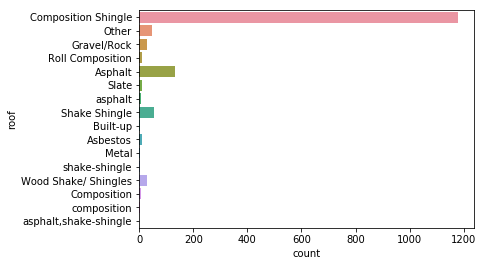

In [7]:
sns.countplot(y='roof', data=df)

In [8]:
df.roof.replace('composition', 'Composition', inplace=True)
df.roof.replace('asphalt', 'Asphalt', inplace=True)
df.roof.replace(['shake-shingle','asphalt, shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

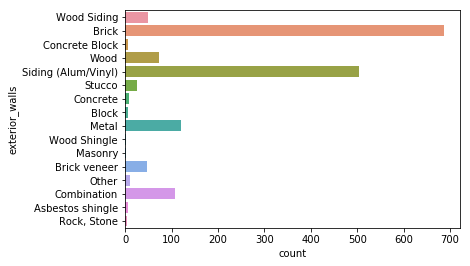

In [9]:
sns.countplot(y='exterior_walls', data=df)

In [10]:
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

In [11]:
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

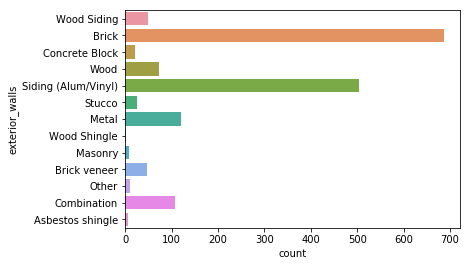

In [12]:
sns.countplot(y='exterior_walls', data=df)

## Remove Unwanted Outliers

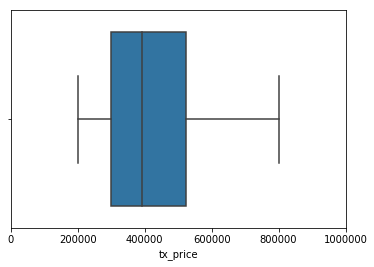

In [13]:
sns.boxplot(df.tx_price)
plt.xlim(0, 1000000)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


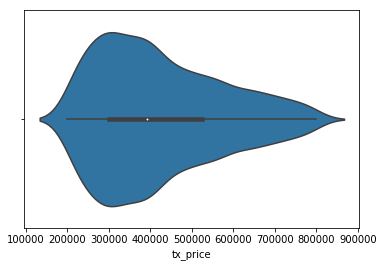

In [14]:
sns.violinplot(df.tx_price)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


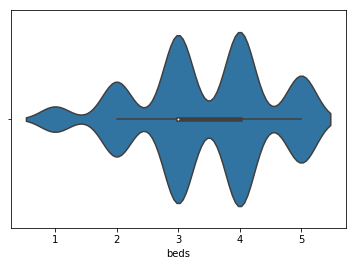

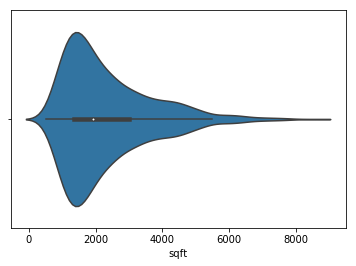

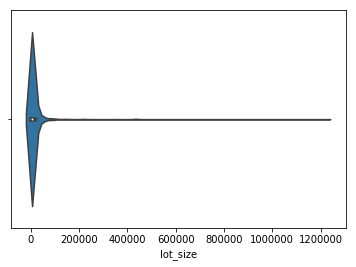

In [15]:
# Search for outliers via violin plot
sns.violinplot(df.beds)
plt.show()

sns.violinplot(df.sqft)
plt.show()

sns.violinplot(df.lot_size)
plt.show()

In [16]:
# seems like lot_size has an outlier - let's check
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [17]:
print(len(df))
df = df[df['lot_size'] <= 500000]
print(len(df))

1883
1882


## Label Missing Categorical Data

In [18]:
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [19]:
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')

In [20]:
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

In [21]:
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

### Save data to CSV

In [22]:
df.to_csv('data/cleaned_real_estate_data.csv',index=None)